<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2018


<img style="width: 400px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/Title_pics.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Logistic regression </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>February 13, 2018</b></p>

<hr style="height:5px;border:none" />

# 1. What is logistic regression?
<hr style="height:1px;border:none" />

In a typical linear regression, the dependent variable $Y$ is expressed as a linear combination of independent variables $X_1$, $X_2$, ... $X_p$

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \epsilon$$

Here, $\beta$s are unknown regression coefficients to be estimated, and $\epsilon$ is the error assumed to follow a normal distribution. This model works well if $Y$ is a continuous variable. But say if $Y$ is a binary variable, taking values either 0 or 1. In that case, the linear model above does not work well since Y is not exactly 0 or 1. 

The solution to modeling a binary outcome variable is to use a logistic regression. Rather than modeling $Y$ directly, it models the probability that $Y$ is 1, or $Pr(Y=1)$. A logistic regression model has the following form:

$$\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \epsilon$$

Or

$$p = \frac{1}{1+\exp\left(-\left(\beta_0 + \beta_1 X_1 + \beta_2 X_2 
                             + \cdots + \beta_p X_p\right)\right)}$$

where $p=Pr(Y=1)$. The function $\log\left(\frac{p}{1-p}\right)$ is referred as a **logit** function. It converts a probability (between 0 and 1) into a real number (between $-\infty$ and $\infty$). With this model, the probability $p=Pr(Y=1)$ can be modeled as a function of independent variables $X$s. Here is an example of the probability $p=Pr(Y=1)$ as it relates to an independent variable $X$ in a logistic regression.

<img style="width: 500px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/Logistic_LogitFunc.png?raw=true" alt="Logistic function"/>

Once a logistic regression model is learned from the data (i.e., all parameters are estimates), then we can use the model as a classifier. For example, if the predicted probability $p>0.5$ then one can predict *success* (i.e., $Y=1$), whereas one can conclude *failure* (i.e., $Y=0$) when $p<0.5$.

Just a side note, the quantity $\frac{p}{1-p}$ is often referred as *odds*. This is different from *probability*. The probability of rolling 6 on a balanced die 1/6, but the odds of rolling 6 is 1/5. This is because odds is the ratio of the probability of getting 6 to the probability of not getting 6.

# Example: breast cancer data
<hr style="height:1px;border:none" />

You may recall the breast cancer data from the [LDA lecture](https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/LinDisc.ipynb). The data set (see **`WiscBrCa_clean.csv`**) includes the diagnosis information (benign or malignant) on N=683 breast tumors along with some pathology features on the tumors. The goal here is to build a logistic regression classifier to predict whether a tumor is malignant based on the features. 

`<WiscBrCaLogistic.py>`

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# loading the data, creating binary target
BrCaData = pd.read_csv('WiscBrCa_clean.csv')
BrCaData['Malignant'] = BrCaData.Class //2 -1  # Binary variable of malignancy
                                               # 0: benign
                                               # 1: malignant

Now let's see if there is any difference between benign and malignant tumors, by calculating feature means for these classes.

In [3]:
# means according to malignancy
print(BrCaData.groupby('Malignant').mean())

                     ID  ClumpThick  UniCellSize  UniCellShape  Adhesion  \
Malignant                                                                  
0          1.115261e+06    2.963964     1.306306      1.414414  1.346847   
1          1.005121e+06    7.188285     6.577406      6.560669  5.585774   

           EpiCellSize   BareNuc  Chromatin  Nucleoli   Mitoses  Class  
Malignant                                                               
0             2.108108  1.346847   2.083333  1.261261  1.065315    2.0  
1             5.326360  7.627615   5.974895  5.857741  2.602510    4.0  


As you can see, the means are substantially different in some of the features.

Now let's prepare the data for logistic regression.

In [4]:
# data for logistic regression
BrCaFeatures = np.array(BrCaData.iloc[:,1:10])
BrCaTargets = np.array(BrCaData.Malignant)
featureNames = np.array(BrCaData.columns[1:10])
targetNames = ['Benign','Malignant']

And splitting the data into the training and testing data sets. The testing data contains 33% of observations. Here, I set **`random_state=0`** so that I can (and you can too!) replicate the results later. 

In [5]:
# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(BrCaFeatures, BrCaTargets,
                                                    test_size=0.33, random_state=0)

Now fitting the logistic regression model. We will use **`LogisticRegression`** object under **`sklearn.linear_model`**. Once we define a logistic regression object, then we can use the **`.fit`** method to learn from the data (*feature* and *target* info, as in LDA). 

In [6]:
# Fitting the logistic regression to the training data
BrCaLR = LogisticRegression()
BrCaLR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now, the model is fitted to the data. We can examine the resulting regression coefficients (i.e., $\beta$s) to see which feature is contributing to outcome. Features with a large magnitude (either positive or negative) are highly associated with $Pr(Y=1)$ (in this case, a malignant tumor). 

If you have learned logistic regression before, you may know that, if you exponentiate a regression coefficient $\beta$, you get an odds ratio associated with a unit increase of the feature. So, let's take a look at the odds ratios rather than regression coefficients.

In [7]:
# Printing out the odds ratios
print('Feature    \tOdds Ratio')
for i,iFeature in enumerate(featureNames):
    print('%-12s' % iFeature, end='')
    # Odds ratio associated with each feature (unit increase)
    print('\t%8.3f' % np.exp(BrCaLR.coef_[0,i]))

Feature    	Odds Ratio
ClumpThick  	   1.134
UniCellSize 	   1.343
UniCellShape	   1.102
Adhesion    	   1.127
EpiCellSize 	   1.005
BareNuc     	   1.546
Chromatin   	   1.164
Nucleoli    	   1.327
Mitoses     	   1.041


Here, a unit increase in **`BareNuc`** increases the odds of a malignant tumor 1.5 times. If the regression coefficient $\beta$ is positive, that means the effect is associated with a higher odds (thus likelihood) of $Y=1$. On the other hand, a negative $\beta$ is associated with a lower odds of $Y=1$.

Just for fun, let's plot the predicted probability of $Y=1$ as well as the predicted classification ($Y=0$ or $1$). Here, we can get the predicted classification with the **`.predict`** method associated with the logistic regression object **`BrCaLR`**. we can get the predicted probability of $Y=1$ with the **`.predict_proba`** method. Both methods only require a testing data set as the input.

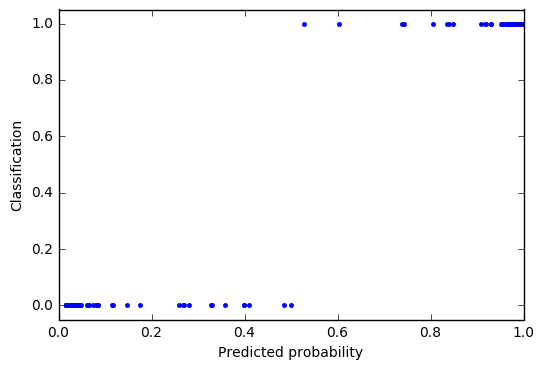

In [8]:
# Classification on the testing data
y_pred = BrCaLR.predict(X_test)
y_prob = BrCaLR.predict_proba(X_test)
plt.plot(y_prob[:,1],y_pred,'b.')
plt.ylim([-0.05, 1.05])
plt.xlabel('Predicted probability')
plt.ylabel('Classification')
plt.show()

As you can see, if $Pr(Y=1)$ is greater than 0.5, then it is classified as $Y=1$.

Finally, let's quantitatively examine the classifier performance.

In [9]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[135   7]
 [ 10  74]]


In [10]:
# classification report
print(classification_report(y_test, y_pred, target_names=targetNames))

             precision    recall  f1-score   support

     Benign       0.93      0.95      0.94       142
  Malignant       0.91      0.88      0.90        84

avg / total       0.92      0.92      0.92       226



Just for a comparison, here is the classification report on the same data set, by an LDA.

```
             precision    recall  f1-score   support

     Benign       0.93      0.96      0.95       142
  Malignant       0.94      0.88      0.91        84

avg / total       0.93      0.93      0.93       226
```

# Example: cryotherapy data
<hr style="height:1px;border:none" />

This is a data set available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Cryotherapy+Dataset+). The data set (available in a CSV file **`Cryotherapy.csv`**) contains the outcomes from a cryotherapy of warts from 90 patients. These are the variables:

  * **`Sex`**: Gender, 1=male, 2=female
  * **`Age`**: Age
  * **`Time`**: Time elapsed before treatment (months)
  * **`NumWarts`**: Number of warts
  * **`Type`**: Types of warts, 1=common, 2=plantar, 3=both
  * **`Area`**: Surface area of warts (mm<sup>2</sup>)
  * **`Success`**: Success in a cryotherapy, 1=yes, 0=no

So, let's load the data set first.

`<CryoLogistic.py>`

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# loading the data
CryoData = pd.read_csv('Cryotherapy.csv')

See if any of the features differ between the successes and failures.

In [7]:
# examining the outcome vs other variables
print(CryoData.groupby('Success').mean())

             Sex        Age       Time  NumWarts      Type        Area
Success                                                               
0        1.52381  36.309524  10.035714  5.214286  2.166667  112.285714
1        1.43750  21.854167   5.593750  5.770833  1.291667   62.687500


So, some features may be highly associated with a success / failure of a cryotherapy. 

Before I fit a logistic regression model, some categorical features need to be converted to a collection of binary variables (a.k.a., dummy variables). This is because a unit increase or decrease in a certain feature (e.g., `Type`) does not make sense. It is common, in a regression model with a categorical predictor, to set one category as the reference category. All the other categories are identified by a collection of dummy variables, each corresponding to a particular category. For example, in our case:

  * **`Female`**: Binary variable, 1=females, 0=males
      * Here, the category *males* is used as the reference category (no dummy variable).  
  * **`Plantar`**: Binary variable, 1=plantar, 0=otherwise
  * **`Both`**: Binary variable, 1=both, 0=otherwise
      * Here, the category *common* is used as the reference category (no dummy variable).

In [8]:
# creating dummy variables for categorical variables
CryoData['Female'] = (CryoData.Sex==2).astype(int)
CryoData['Plantar'] = (CryoData.Type==2).astype(int)
CryoData['Both'] = (CryoData.Type==3).astype(int)

# Data for logistic regression
CryoFeatures = np.array(CryoData.loc[:,['Age', 'Time', 'NumWarts', 'Area',
                                        'Female', 'Plantar', 'Both']])
CryoTargets = np.array(CryoData.loc[:,'Success'])
featureNames = ['Age', 'Time', 'NumWarts', 'Area', 'Female', 'Plantar', 'Both']
targetNames = ['Failure','Success']

### Exercise
1. **Learning from the cryotherapy data**. Split the data set into the training data and testing data sets, with the testing data set including 30% of all available observations. Then fit the logistic regression model on the training data set. Print out odds ratios associated with the features used in this analysis. Which features seem to be associated with the outcome?
2. **Classification on the cryotherapy data**. Fit the testing data set to the logistic regression model produced earlier. Produce the confusion matrix as well as the classification report. 

# Multi-class logistic regression
<hr style="height:1px;border:none" />

A logistic regression model assumes that the dependent variable is binary (i.e., $Y=0$ or $Y=1$). However, you can extend logistic regression to cases where the dependent variable takes more than two classes (e.g., $Y=0$, $1$, or $2$). In that case, separate logistic regression models are fitted, with each class as the outcome of interest. In other words, if there are 3 classes of $Y$, then three logistic regression models are fitted with

  * $Pr(Y=0)$
  * $Pr(Y=1)$
  * $Pr(Y=2)$

modeled as the outcome.A logistic regression classifier then calculates the probabilities for all these possible outcomes, and chooses the one with the highest probability as the predicted outcome.

## Example: iris data

As you recall, the iris data has 3 classes of the target (Setosa, Versicolor, and Virginica). We can use a logistic regression classifier to classify these classes.

`<IrisLogistic.py>`

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# Loading the iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

First, let's see if any of the features are associated with target classes.

In [3]:
# means according types
irisDF = pd.DataFrame(np.hstack([X,np.array([y]).T]),
                      columns=iris.feature_names + ['target'])
print(irisDF.groupby('target').mean())

        sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0.0                 5.006             3.418              1.464   
1.0                 5.936             2.770              4.260   
2.0                 6.588             2.974              5.552   

        petal width (cm)  
target                    
0.0                0.244  
1.0                1.326  
2.0                2.026  


As you can see, some features are different between the different classes.

Now let's create a training data set and a testing data set.

In [4]:
# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0)

Then let's fit a logistic regression model. Notice that, the target variable has multiple classes now, but you can use in a similar way as a binary logistic regression model. 

In [5]:
# Fitting the logisic regression to the training data
irisLR = LogisticRegression()
irisLR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now, let's fit the testing data to the logistic regression classifier. 

In [6]:
# Classification on the testing data
y_pred = irisLR.predict(X_test)
y_prob = irisLR.predict_proba(X_test)

Here, let's plot the classification probabilities for different classes.

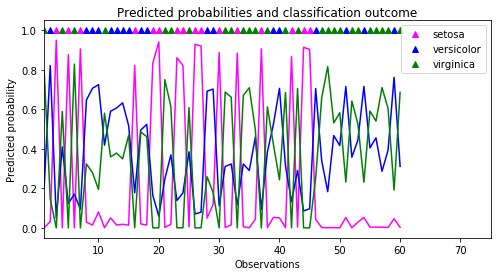

In [7]:
# plotting the probabilities for different classes 
targetColors = ['magenta', 'blue', 'green']
obsVec = np.arange(1,len(y_prob)+1)
plt.figure(figsize=[8,4])
for iClass in range(3):
    plt.plot(obsVec,y_prob[:,iClass], 
             ls='-', c=targetColors[iClass])
    plt.plot(obsVec[y_pred==iClass],np.ones_like(obsVec[y_pred==iClass]),
             marker = '^', ls='none', c=targetColors[iClass], 
             label=target_names[iClass])
plt.ylim([-0.05, 1.05])
plt.xlim([1,75])
plt.xlabel('Observations')
plt.ylabel('Predicted probability')
plt.title('Predicted probabilities and classification outcome')
plt.legend(loc=0)
plt.show()

Notice that the classifier outcome is the one with the highest probability.

Finally, some metrics for classifier performance.

In [8]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[16  0  0]
 [ 0 18  5]
 [ 0  0 21]]


In [9]:
# classification report
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.78      0.88        23
  virginica       0.81      1.00      0.89        21

avg / total       0.93      0.92      0.92        60



## Example: digits data

Here is another example of multi-class logistic regression classifier. This time, we examine the digits data. 

`<DigitsLogistic.py>`

In [10]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# loading the digits data
digits = datasets.load_digits()
digitsX = digits.data    # the data, 1797 x 64 array
digitsTargets = digits.target # target information
digitsTargetNames = [str(digits.target_names[i]) 
                     for i in range(len(digits.target_names))]  # digits

Recall there are 64 features (corresponding to 64 pixes) in this data set. Unfortunately logistic regression does not work as a dimension reduction algorithm like a linear discriminant analysis. Thus, we need to reduce the data dimension before we run logistic regression. In one of our previous classes, I determined that the data set can be reduced to a 13-dimensional space using a PCA. Then we split the PCA-transformed data into the training and testing data sets.

In [11]:
# dimension reduction with PCA, with 13 PCs
digitsPCA = PCA(n_components=13)
digitsPCs = digitsPCA.fit_transform(digitsX)


# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(digitsPCs,
                                                    digitsTargets, 
                                                    test_size=0.3,
                                                    random_state=0)

### Exercise
1. **Digits data, logistic regression**. Fit a logistic regression model on the PCA-transformed training data set. Determine predicted class labels on the testing data. Evaluate the performance of the classifier with a confusion matrix and a classification report.
2. **Digits data, LDA**. As a comparison, perform a linear discriminant analysis (LDA) on the PCA-transformed training data, with 2 components. Predict the class labels on the testing data. Evaluate the performance of the classifier with a confusion matrix and a classification report.

# Note on logistic regression
<hr style="height:1px;border:none" />

**Strengths**:
  * The model is easy to interpret.
  * Regression coefficients are readily interpretable as log-odds ratios.
  * A well-known statistical model
  
**Weaknesses**:
  * The user has to decide what features go into the model
    * An elaborate model selection scheme or a dimension reduction is necessary
  * (Not unique to logistic regression) A categorical variable has to be converted to a collection of dummy variables.